In [6]:
import pandas as pd

dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

In [26]:
dataset

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000
...,...,...,...,...,...,...,...,...,...
4995,1724011,2019-12-01,12838,Tangerang,Banten,P3047,BRAND_R,2,450000
4996,1676302,2019-07-28,13833,Bogor,Jawa Barat,P0760,BRAND_C,3,1465000
4997,1706071,2019-10-23,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4,747000
4998,1703620,2019-10-17,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8,695000


In [27]:
print("Lima Data Teratas: ")
print(dataset.head())

Lima Data Teratas: 
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


In [28]:
## Exploratory Data Analyst
## Data Mining, Data Cleansing, Analytics

print("ukuran dataset: %d baris dan %d kolom\n" % dataset.shape)

ukuran dataset: 5000 baris dan 9 kolom



In [60]:
## Order Month
import datetime # library untuk mendapatkan tanggal system (mengolah data waktu sesuai dengan kebutuhan)

# dataset masih mentah, python ini format date seperti apa
# transform dulu ke format yang diinginkan (d-m-y) atau (y-m-d) atau (y-d-m) strptime buat transform kolom dataset
# strptime extract data dari strptime setelah ditransform,baru kita bisa filter data yang kita inginkan(misalnya ambil bulannya saja)
# atau tahunnya saja, bulan-tahun, hari-bulan, dst

dataset['month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d").strftime('%Y-%m'))

In [37]:
# kolom month memudahkan kita untuk melakukan filter data berdasarkan bulan dengan visualisasi
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,month
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000,2019-10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000,2019-10
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000,2019-11
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000,2019-08
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000,2019-10


In [39]:
# di dunia retail atau ecommerce atau penjualan
# GMV Gross Marchandise Value <- indicator penjualan kita bagus atau tidak akumulasi dari data pembelian user/cutom
# GMV = item_price = qty <- kita mendapatkan value penjualan kita 
dataset['gmv'] = dataset['item_price'] = dataset['quantity']

In [40]:
dataset.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,month,gmv
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,10,2019-10,10
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,2,2019-10,2
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,8,2019-11,8
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,4,2019-08,4
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,2,2019-10,2


In [41]:
# summary GMV based on bulan

monthly_gmv = dataset.groupby('month')['gmv'].sum().reset_index() # mirip order by

monthly_gmv.head()

,month,gmv
0,2019-07,6437
1,2019-08,8122
2,2019-09,6959
3,2019-10,11195
4,2019-11,10812


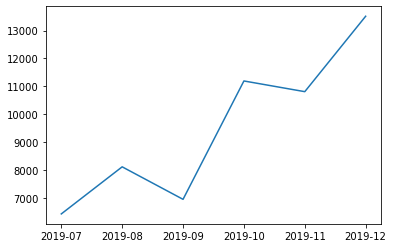

In [46]:
# membuat plot pertama 

import matplotlib.pyplot as plt # plt alias dari plot

plt.plot(monthly_gmv['month'], monthly_gmv['gmv']) # plt.plot(sumbu x (pake kolom apa), sumbu y (pake kolom apa))

plt.show()

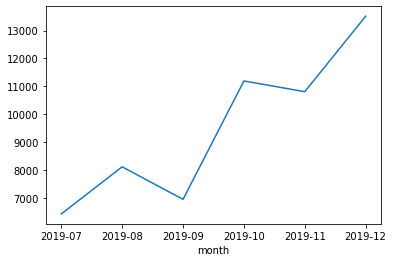

In [45]:
# melalui  library pandas yaitu dataframe
#groupby sudah pasti x, karena grouping itu horizontal visual
dataset.groupby(['month'])['gmv'].sum().plot()

plt.show()

In [47]:
# ie9 number scientific menyingkat tampilan data menjadi scitifik 0 nya 9 1.000.0000.000
# muncul ie9, ada banyak cara. R options(scipen = 999). python pake library numpy '%f %' nomor berapa

# plt(x,y) -> horizontal?,vertical?



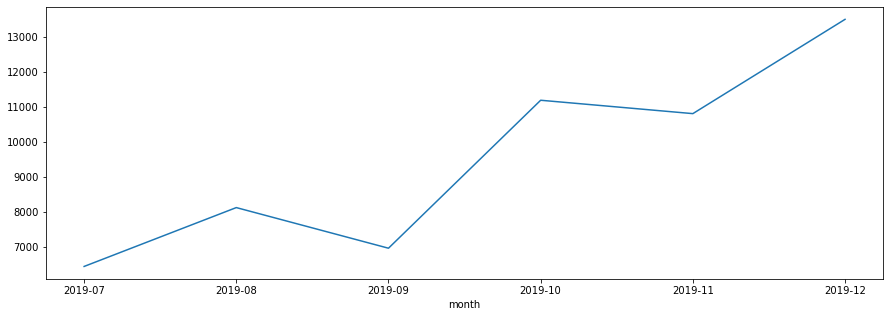

In [48]:
# ubah ukuran figure/canvas visual kalian 

plt.figure(figsize=(15,5)) # figsize(panjang=15px, lebar=5px)
dataset.groupby(['month'])['gmv'].sum().plot()

plt.show()

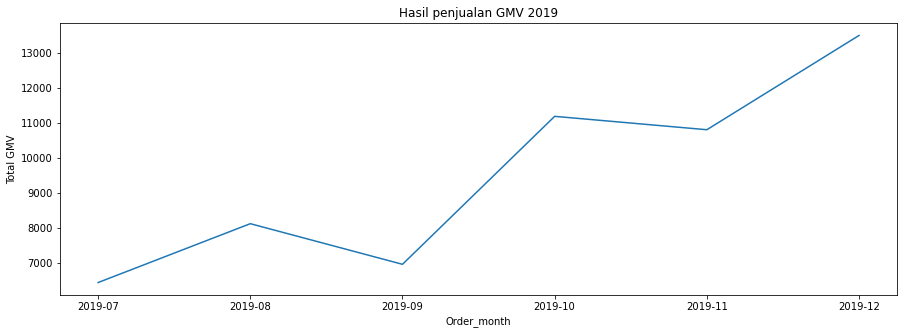

In [56]:
# Title dan axis label

plt.figure(figsize=(15,5)) # figsize(panjang=15px, lebar=5px)
dataset.groupby(['month'])['gmv'].sum().plot()
plt.title("Hasil penjualan GMV 2019")
plt.xlabel("Order_month")
plt.ylabel("Total GMV")

plt.show()

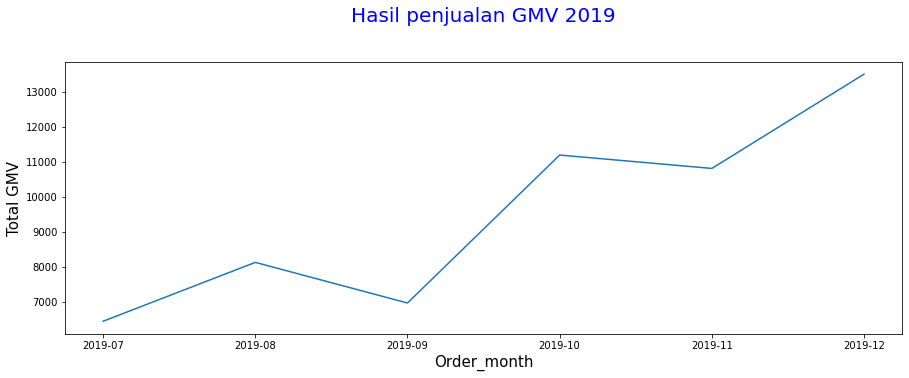

In [57]:
# sebagai data analyst, harus paham concept desgin <-- data yang akann kita tampilkan
# Harus mudah di lihat oleh user, BI engineer mirip Data Engineer
# BI Engineer  menyediakan visualisasi data yang di butuhkan

plt.figure(figsize=(15,5)) # figsize(panjang=15px, lebar=5px)
dataset.groupby(['month'])['gmv'].sum().plot()
plt.title("Hasil penjualan GMV 2019", loc="center", pad=40, fontsize=20, color='blue')
plt.xlabel("Order_month", fontsize=15)
plt.ylabel("Total GMV", fontsize=15)

plt.show()

In [64]:
# tambah grid, atau hilangin grid, tambah point tiaap sudutnya
# bisa diberi reference tooltips
# awalnya ada 3 kolom
# A B
# 1 2
# 3 4

#unstack() <- membuat level baru dari dataset 
# A 1 2
# B 3 4

from datetime import datetime
str(datetime.now().strftime('W%w_%b_%y'))

'W1_Jun_21'

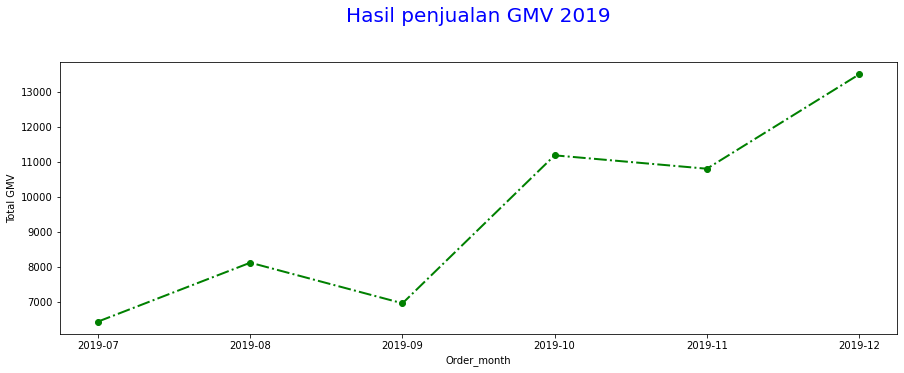

In [66]:
# kustomisasi line dan point pada visual

plt.figure(figsize=(15,5)) # figsize(panjang=15px, lebar=5px)
dataset.groupby(['month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title("Hasil penjualan GMV 2019", loc="center", pad=40, fontsize=20, color='blue')
plt.xlabel("Order_month")
plt.ylabel("Total GMV")

plt.show()

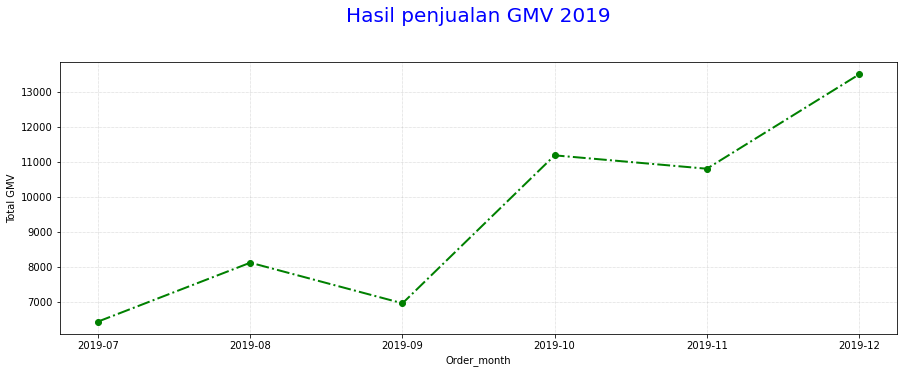

In [69]:
# kustomisasi line dan point pada visual

plt.figure(figsize=(15,5)) # figsize(panjang=15px, lebar=5px)
dataset.groupby(['month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title("Hasil penjualan GMV 2019", loc="center", pad=40, fontsize=20, color='blue')
plt.xlabel("Order_month")
plt.ylabel("Total GMV")
plt.grid(color="darkgray", linestyle=':', linewidth=0.5)

plt.show()

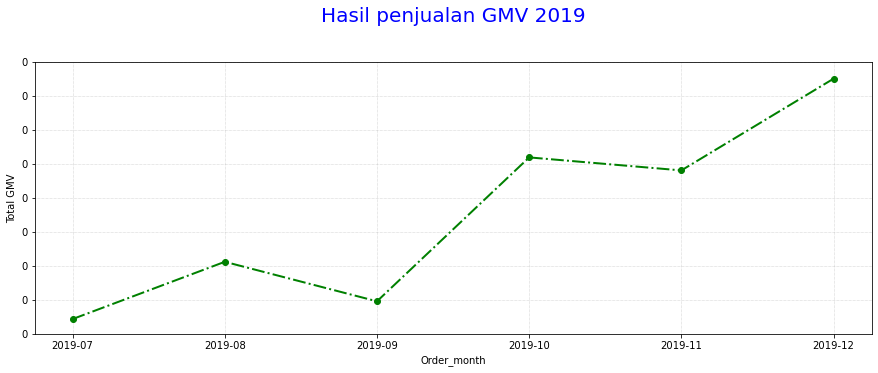

In [73]:
# ticks untuk menghilangkan ies9

plt.figure(figsize=(15,5)) # figsize(panjang=15px, lebar=5px)
dataset.groupby(['month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title("Hasil penjualan GMV 2019", loc="center", pad=40, fontsize=20, color='blue')
plt.xlabel("Order_month")
plt.ylabel("Total GMV")
plt.grid(color="darkgray", linestyle=':', linewidth=0.5)

labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

# jadi 0 karena memang tidak ada ies9

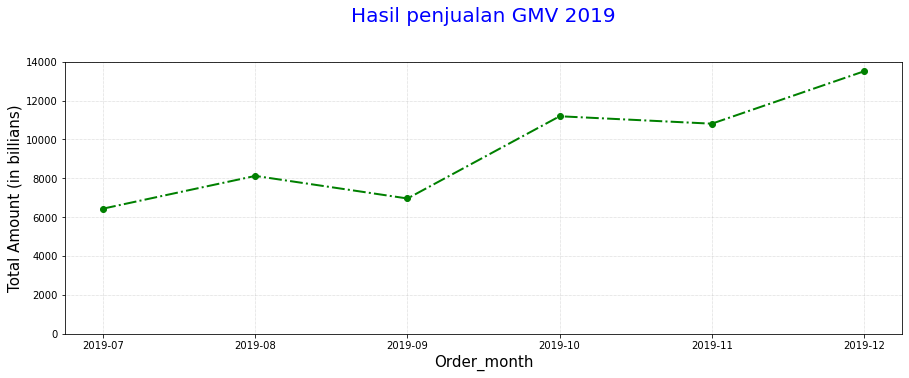

In [76]:
# cara membuat min di total amount dari 0

plt.figure(figsize=(15,5)) # figsize(panjang=15px, lebar=5px)
dataset.groupby(['month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title("Hasil penjualan GMV 2019", loc="center", pad=40, fontsize=20, color='blue')
plt.xlabel("Order_month", fontsize=15)
plt.ylabel("Total Amount (in billians)", fontsize=15)
plt.grid(color="darkgray", linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int)) # options(scipen=999)

plt.show()

<Figure size 1080x360 with 0 Axes>

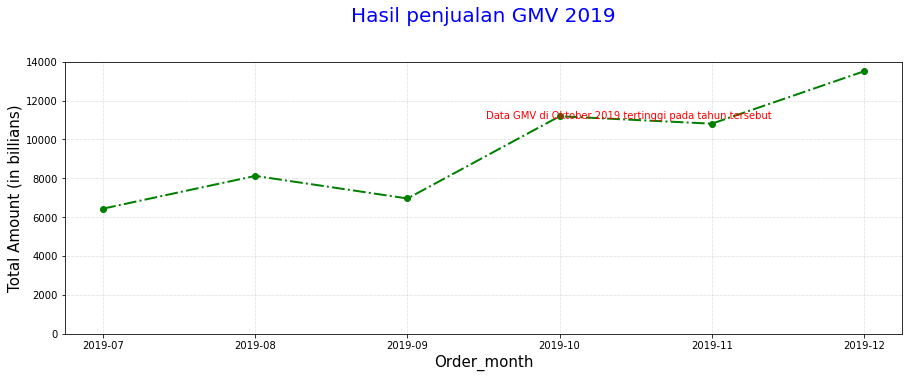

In [82]:
# reference tooltips
fig = plt.figure(figsize=[15, 5])

plt.figure(figsize=(15,5)) # figsize(panjang=15px, lebar=5px)
dataset.groupby(['month'])['gmv'].sum().plot(color='green', marker='o', linestyle='-.', linewidth=2)
plt.title("Hasil penjualan GMV 2019", loc="center", pad=40, fontsize=20, color='blue')
plt.xlabel("Order_month", fontsize=15)
plt.ylabel("Total Amount (in billians)", fontsize=15)
plt.grid(color="darkgray", linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels).astype(int)) # options(scipen=999)
plt.text(0.45,0.72,'Data GMV di Oktober 2019 tertinggi pada tahun tersebut', transform=fig.transFigure, color='red')

plt.show()

In [83]:
# library mysql.connector baru pandas bisa baca database
# koneksikan database pake connector di atas ini, setelah transform table ke dataframe di pandas
# pandas langsung ke database

# mysql(host='localhost',password;'xxx', database='db')
#function python cursor, looping
# db_cursor,fetchall di table_sales
# dataset = pd.dataframe(table_sales) <- dataframe pandas
# function scientific
# def million(x, total_gmv):
# return '%1.1fB'% [x*le=9]
# formatter = funcFormatter(million)

In [85]:
# cara menyimpan grafik

plt.savefig('persentation_sales_2019.png',quality=95)

<ipython-input-85-8208141e9fc8>:3: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('persentation_sales_2019.png',quality=95)


<Figure size 432x288 with 0 Axes>

In [88]:
# dataset A sama dataset B
# tampilan dalam satu grafik
# kalian joinkan datset A dan dataset B dengan.key misalnya id --> dataset C
# buat streaming data, jadi bisanya batch data
# sinyapps.io di R kalian bisa streaming data  
# visualisasi data tools <- tableau, quicksight, metabase, dll

# membuat pie chart, box chart, multiple chart
# ada 5 garis perbandingan ex : salesA, salesB, salesC, dll
#scatterplot plot ballon <-- data science <-- model machine learning --> k-near neighboar

# df.iloc['gmv']

In [91]:
# R <- mudah dipahami buat orang awam yang belum mengerti coding
# python <- minimal harus tau konsep OOP
# bi tools tableau <- Mudah dipelajari:D drag and drop masalahnya tableau mahal 7$/bulan
# tableau student license, server menggunakan  tableau public
# metabase <- opensource, mudah bila mengerti query sql basic grafiknya menggunakan mysql, sqlserver, sql, postg
# shinyapps <- framework R,khusus visualisasi dashboard
# csv, database, json, api, avron, excel, nosql selagi bisa di olah python dan R
# data google analytics <- rest api json outputnya, mixpanel <- json, data warehouse <- database (mysql/nosql)

# makerfacecolor = warna marker, color= buat line <-- plt(dataset, color='red', marker='o', markerfacecolor='blue')


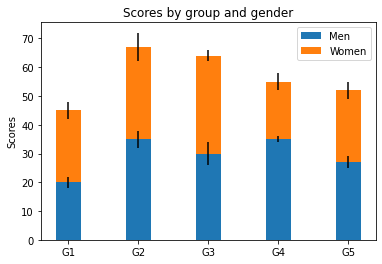

In [92]:
#stack bar

import matplotlib.pyplot as plt


labels = ['G1', 'G2', 'G3', 'G4', 'G5']
men_means = [20, 35, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]
men_std = [2, 3, 4, 1, 2]
women_std = [3, 5, 2, 3, 3]
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, yerr=men_std, label='Men')
ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
       label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

In [93]:
# Learn-By Prayoga

In [ ]:
# END